In [1]:
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('employee_course_ratings.csv')
df.head()

,EmployeeID,EmpName,CourseID,CourseName,Rating
0,1408,Ignace Ormonde,14,Video Production,3
1,1249,Gabriela Balcon,17,Translation,2
2,1158,Enrique Lewer,8,IT Architecture,3
3,1564,Wallie Byrd,18,Natural Language Processing,3
4,1334,Hannah Ganter,6,Java Programming,4


In [3]:
X = df.drop(['EmployeeID','EmpName','CourseName'],1)
y = df['CourseName']

<ipython-input-3-142a0798ee52>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop(['EmployeeID','EmpName','CourseName'],1)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [5]:
X_train

,CourseID,Rating
172,18,2
794,25,1
178,18,2
789,3,2
696,16,4
...,...,...
134,18,2
326,24,3
850,21,3
981,22,4


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
normal = LabelEncoder()

In [8]:
y_train = normal.fit_transform(y_train)

In [9]:
y_train

array([16,  8, 16,  7,  2, 16, 18,  1, 12,  5,  0, 19, 17,  4, 11,  1, 17,
       16,  3, 12, 22, 16, 13, 23, 15,  0, 22,  2,  5, 16, 11,  4,  1,  4,
        9, 14, 20, 18,  3,  8, 21, 21,  1, 21, 16,  7, 12,  5, 12,  0, 18,
       16,  2, 13,  7, 22, 13, 21,  9,  8,  2, 14,  9, 24, 16, 18, 20,  1,
        3, 15, 12,  9, 19,  0, 14, 22, 19, 23,  2, 10,  3, 24, 17,  5,  1,
       10,  4, 15, 10, 16, 18,  2, 13,  9, 19, 24,  3, 14,  9, 17,  3, 20,
       10,  4,  0, 11, 16,  8,  1, 12, 14,  7, 11, 17,  8, 22,  9, 10, 24,
        1,  3,  5,  3,  2, 17, 24,  4,  5, 13,  1, 10,  2, 20, 19, 10, 23,
        4, 20,  8,  5,  0,  1,  7, 19, 15, 21,  7,  3, 21, 17,  3,  4, 18,
       19,  9, 18, 23,  1, 19,  0,  3, 18,  4,  0, 14,  1, 12, 17,  9,  3,
        6, 20, 13, 10, 11, 23,  6, 21, 10,  9, 11, 21,  1,  3,  5,  8,  9,
       14, 16, 10, 24,  1, 10,  8,  2,  3, 11, 13, 13,  0, 19, 24, 12,  9,
       21, 19,  0,  7,  5, 14,  6, 12,  8,  8, 24, 23,  2,  3,  1, 13,  7,
        2, 21, 24, 24,  3

In [10]:
y_test = normal.fit_transform(y_test)

In [11]:
y_test

array([ 8, 21,  7, 13,  0, 23,  5, 13,  6, 24, 11,  5,  2, 24,  0, 12, 13,
       10, 13,  8, 15,  7,  6,  1, 19,  4, 11, 16,  8,  8, 24,  1, 12, 19,
        0, 17, 11, 21, 10,  0, 16,  9,  3,  2,  0, 12, 17, 24,  8, 17, 14,
        6, 14,  1,  7, 23,  6, 22, 22, 12,  6, 23, 21, 24, 13,  7, 12, 10,
       24, 17, 11,  6,  7, 24,  3, 11, 23, 13, 10,  1, 22,  8, 14,  1, 15,
       20, 18,  6, 17,  7,  8, 23,  5, 24,  3, 16, 11, 17,  1, 17, 15, 10,
       21,  4, 21, 23,  8,  4,  5, 11,  3,  5,  5, 11,  6,  7, 15, 11,  8,
        4,  5,  9,  2,  2, 19,  5, 11, 18, 16, 17, 20,  5, 22, 20,  8, 10,
       19, 21,  1,  4, 20, 17, 19,  6, 12, 23, 15, 10,  2,  5, 23,  8, 18,
       11,  5, 17,  3,  8, 10, 16, 10,  0,  2, 20, 20, 10, 11, 16,  9,  3,
        6, 22, 12, 23,  1,  9,  9, 12,  8, 23,  5, 24, 22,  4, 22,  3, 15,
       13,  7, 19, 23,  1,  5,  5, 16,  2,  3, 23, 23, 14, 19,  1,  8,  3,
       13, 18,  3,  1,  9,  0, 13,  7, 23,  8,  0,  5, 24, 10,  6, 23, 23,
       23, 21,  3,  2,  7

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
model = GradientBoostingRegressor()

In [14]:
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [15]:
model.score(X_test,y_test)

0.9958233136930394

In [21]:
y_pred = around(model.predict(X_test))

In [25]:
y_pred = y_pred.astype('int')

In [26]:
y_test

array([ 8, 21,  7, 13,  0, 23,  5, 13,  6, 24, 11,  5,  2, 24,  0, 12, 13,
       10, 13,  8, 15,  7,  6,  1, 19,  4, 11, 16,  8,  8, 24,  1, 12, 19,
        0, 17, 11, 21, 10,  0, 16,  9,  3,  2,  0, 12, 17, 24,  8, 17, 14,
        6, 14,  1,  7, 23,  6, 22, 22, 12,  6, 23, 21, 24, 13,  7, 12, 10,
       24, 17, 11,  6,  7, 24,  3, 11, 23, 13, 10,  1, 22,  8, 14,  1, 15,
       20, 18,  6, 17,  7,  8, 23,  5, 24,  3, 16, 11, 17,  1, 17, 15, 10,
       21,  4, 21, 23,  8,  4,  5, 11,  3,  5,  5, 11,  6,  7, 15, 11,  8,
        4,  5,  9,  2,  2, 19,  5, 11, 18, 16, 17, 20,  5, 22, 20,  8, 10,
       19, 21,  1,  4, 20, 17, 19,  6, 12, 23, 15, 10,  2,  5, 23,  8, 18,
       11,  5, 17,  3,  8, 10, 16, 10,  0,  2, 20, 20, 10, 11, 16,  9,  3,
        6, 22, 12, 23,  1,  9,  9, 12,  8, 23,  5, 24, 22,  4, 22,  3, 15,
       13,  7, 19, 23,  1,  5,  5, 16,  2,  3, 23, 23, 14, 19,  1,  8,  3,
       13, 18,  3,  1,  9,  0, 13,  7, 23,  8,  0,  5, 24, 10,  6, 23, 23,
       23, 21,  3,  2,  7

In [27]:
predicted = pd.DataFrame(normal.inverse_transform(y_pred))

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

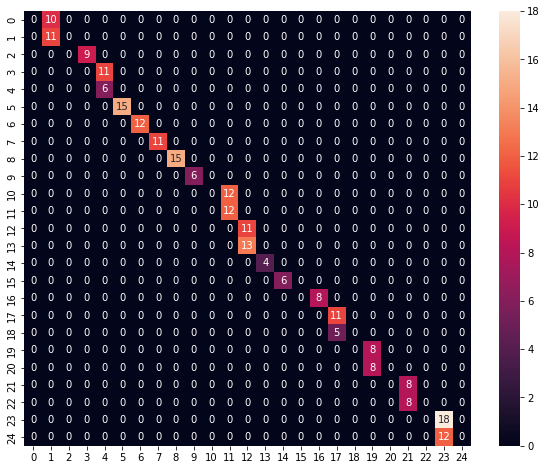

In [30]:
import seaborn as sn
plt.figure(figsize=(10,8))
sn.heatmap(cm,annot=True)

In [31]:
predicted

,0
0,Digital Marketing
1,Social Media Marketing
2,Data Management
3,Java Programming
4,Animation
...,...
245,People Management
246,Sales Leadership
247,Java Programming
248,Blockchain


In [32]:
y_t = pd.DataFrame(normal.inverse_transform(y_test))

In [34]:
y_t

,0
0,Digital Marketing
1,Social Media Marketing
2,Data Management
3,Journalism
4,Analytical Reasoning
...,...
245,People Management
246,Sales Leadership
247,Java Programming
248,Audio Production
